# Exercise 1

We first load a dataset and examine its dimensions.

In [33]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

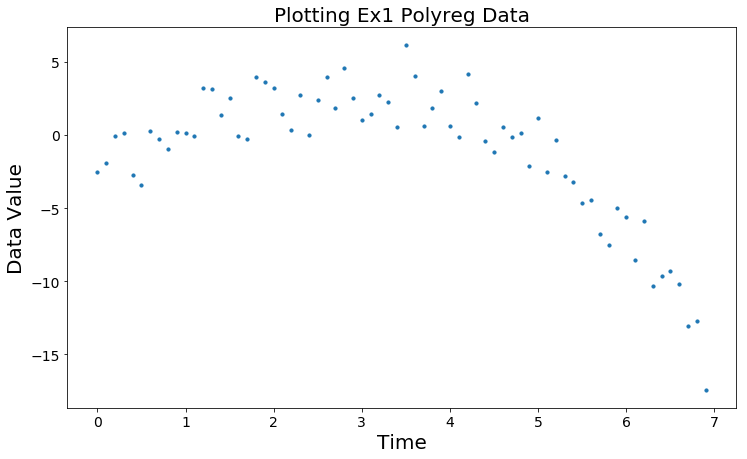

In [34]:
import matplotlib.pyplot as plt
# Your code for scatterplot here

x = xy_data[:,0]  # First column of array (indexed by 0) contains x values
y = xy_data[:,1]  # Second column of array (indexed by 1) contains y values


# Set parameters to make sure figures are large enough. You can try changing these values
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(x, y, s=10)   # s can be used to adjust the size of the dots
plt.xlabel('Time')
plt.ylabel('Data Value')
plt.title('Plotting Ex1 Polyreg Data')
plt.show()


### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [35]:
def polyreg(data_matrix, k):
    # Your code here
    # The function should return the the coefficient vector beta, the fit, and the vector of residuals
    
    time = data_matrix[:,0]
    yvalues = data_matrix[:,1]
    
    N = np.shape(data_matrix)[0]
    if k >= N:
        k = N-1
    
    # Create array with polynomials of X up until specified k or N-1
    all_ones = np.ones(np.shape(time))
    x_array = []
    for i in range(k+1):
        if i == 0:
            x_array.append(all_ones)
        else:
            x_array.append(time**i)
        
    
    # Create a matrix X2T with the first row all ones, second row containing dates, and the third row containing square of dates
    X2T = np.vstack(x_array)
    X2 = np.transpose(X2T)  # defining the X matrix

    # Computing the coefficient vector beta* using least squares formula
    beta_poly = np.linalg.lstsq(X2, yvalues, rcond=None)[0]
    
    fit_poly = X2.dot(beta_poly)   # Computing the fit of the quadratic model
    resid_poly = yvalues - fit_poly # Computing residual
    
    return (beta_poly,fit_poly,resid_poly)
    

Use the tests below to check the outputs of the function you have written:

In [36]:
# Some tests to make sure your  function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

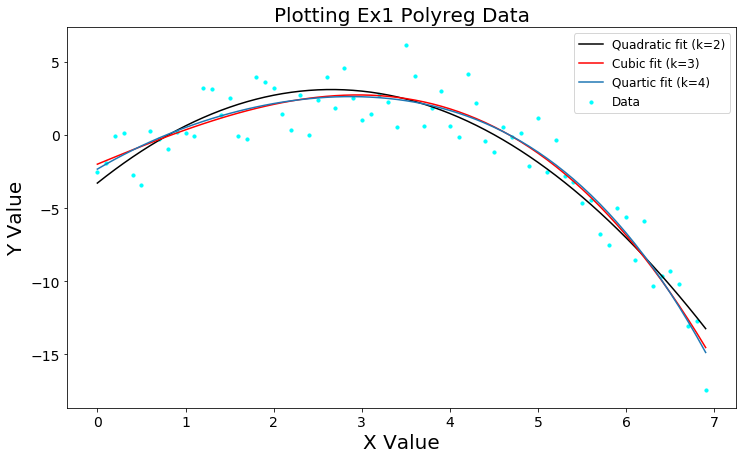

For k=2:
SSE_2 =  172.18
R^2 for the quadratic model =  0.8876

For k=3:
SSE_3 =  152.41
R^2 for the cubic model =  0.9005

For k=4:
SSE_4 =  151.23
R^2 for the quartic model =  0.9013


In [48]:
# Use polyreg to fit xy_data for k=2,3,4
k2_polyreg = polyreg(xy_data, k=2)
k3_polyreg = polyreg(xy_data, k=3)
k4_polyreg = polyreg(xy_data, k=4)

# Set parameters to make sure figures are large enough. You can try changing these values
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(x, y, s=10, color = 'cyan', label = 'Data')   # s can be used to adjust the size of the dots
plt.plot(x, k2_polyreg[-2], color = 'black', label = 'Quadratic fit (k=2)')
plt.plot(x, k3_polyreg[-2], color = 'red', label = 'Cubic fit (k=3)')
plt.plot(x, k4_polyreg[-2], label = 'Quartic fit (k=4)')
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Plotting Ex1 Polyreg Data')
plt.legend(fontsize = 'large')
plt.show()

# Compute and print the SSE and 𝑅^2
k0_polyreg = polyreg(xy_data, k=0)

SSE_0 = np.linalg.norm(k0_polyreg[-1])**2
SSE_2 = np.linalg.norm(k2_polyreg[-1])**2
SSE_3 = np.linalg.norm(k3_polyreg[-1])**2
SSE_4 = np.linalg.norm(k4_polyreg[-1])**2

print('For k=2:')
print('SSE_2 = ', np.round_(SSE_2, 2))  
print('R^2 for the quadratic model = ', np.round_(1- SSE_2/SSE_0, 4))

print('\nFor k=3:')
print('SSE_3 = ', np.round_(SSE_3, 2))
print('R^2 for the cubic model = ', np.round_(1- SSE_3/SSE_0, 4))

print('\nFor k=4:')
print('SSE_4 = ', np.round_(SSE_4, 2))
print('R^2 for the quartic model = ', np.round_(1- SSE_4/SSE_0, 4))

 #### State which model you choose and briefly justify your choice.
 
 
 I would choose the quartic model, k=4, as it has the highest R^2 coefficient thus suggesting it fits the data best.
 
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

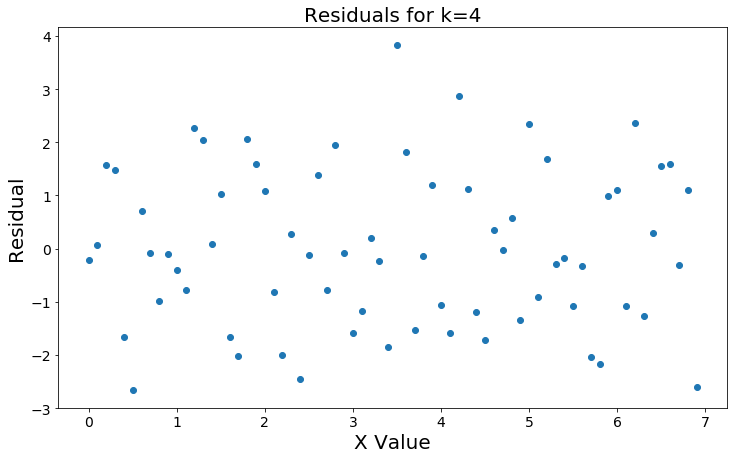

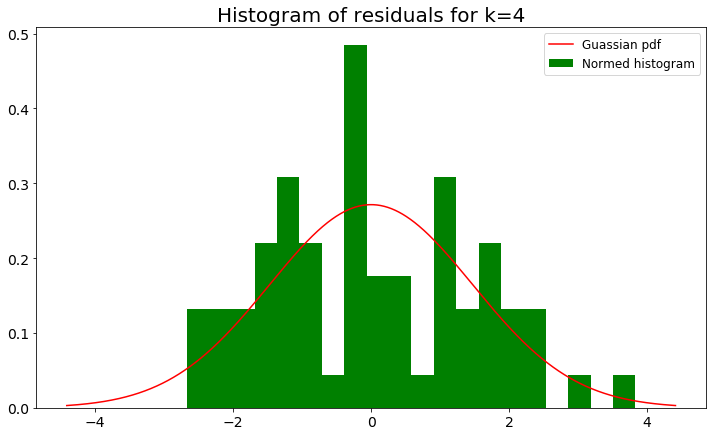

In [54]:
residual_k4 = k4_polyreg[-1]

# Plot residuals for k=4
plt.rcParams['figure.figsize'] = [12, 7]
plt.scatter(x, residual_k4)
plt.xlabel('X Value')
plt.ylabel('Residual')
plt.title('Residuals for k=4')
plt.show()

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(residual_k4, bins=20, density=True, facecolor='green', label = 'Normed histogram');

# Plot Gaussian pdf with same mean and variance as the residuals
from scipy.stats import norm
res_k4_stdev = np.std(residual_k4)  #standard deviation of residuals
xvals = np.linspace(-3*res_k4_stdev,3*res_k4_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_k4_stdev), 'r', label = 'Guassian pdf')
plt.title('Histogram of residuals for k=4')
plt.legend(fontsize = 'large')
plt.show()
